<font size=7> Data 1- Raw Animations

In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from human_hip.raw_data import get_brain_waves
from human_hip.animate import animate_waves_theta


# 105 Seconds

In [3]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/base_start105s_stop115s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
data_raw.keys()

dict_keys(['data', 'xy', 'frame_rate'])

## Theta

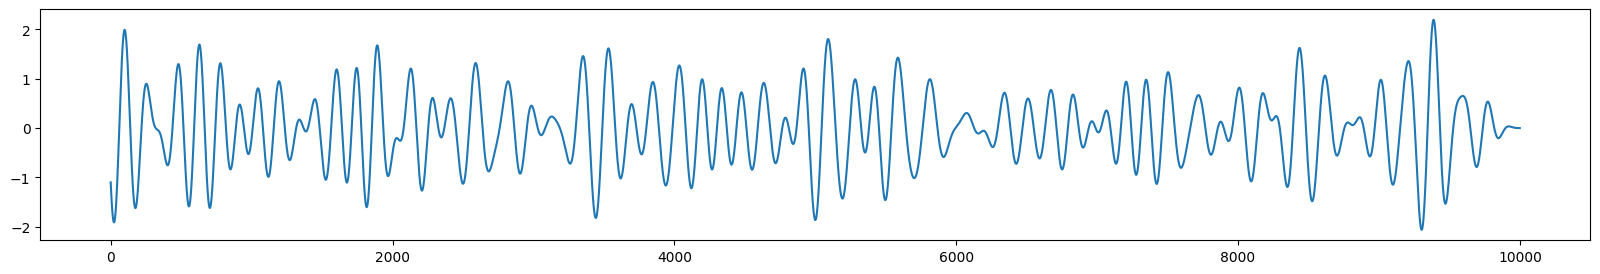

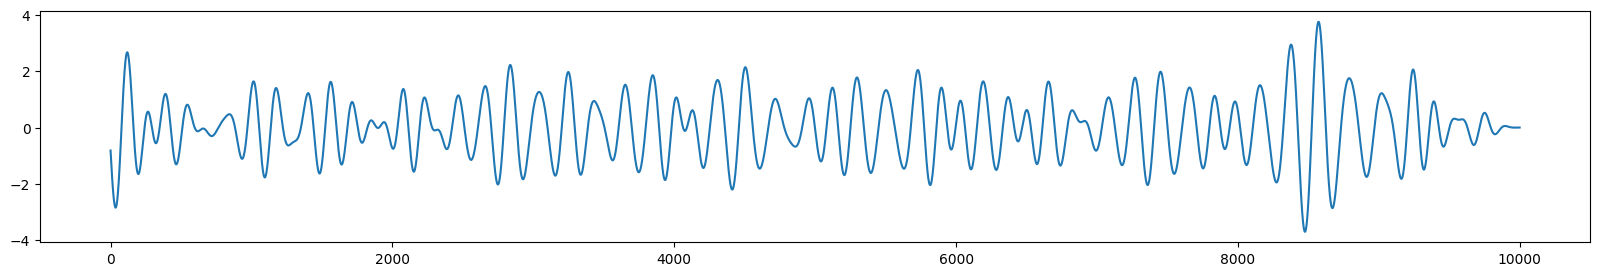

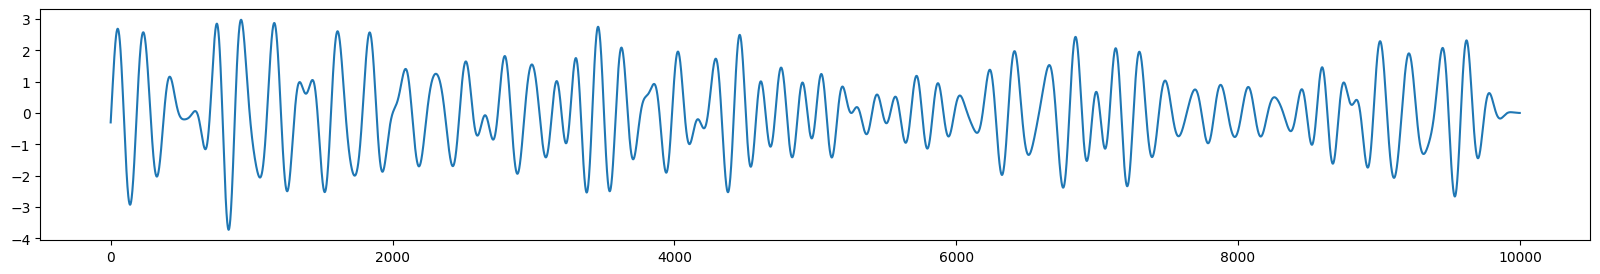

In [15]:
#print(waves["alpha"].shape)
waves = get_brain_waves(data_raw["data"], data_raw["frame_rate"])
for i in range(0,300,100):
    #print(i)
    plt.figure(figsize=(20,3))
    plt.plot( [*range(waves["basic"].shape[1])], waves["theta"][i,:] )
    plt.show()

Making animation of 0.333 minutes
Saved animation to theta_waves.mp4


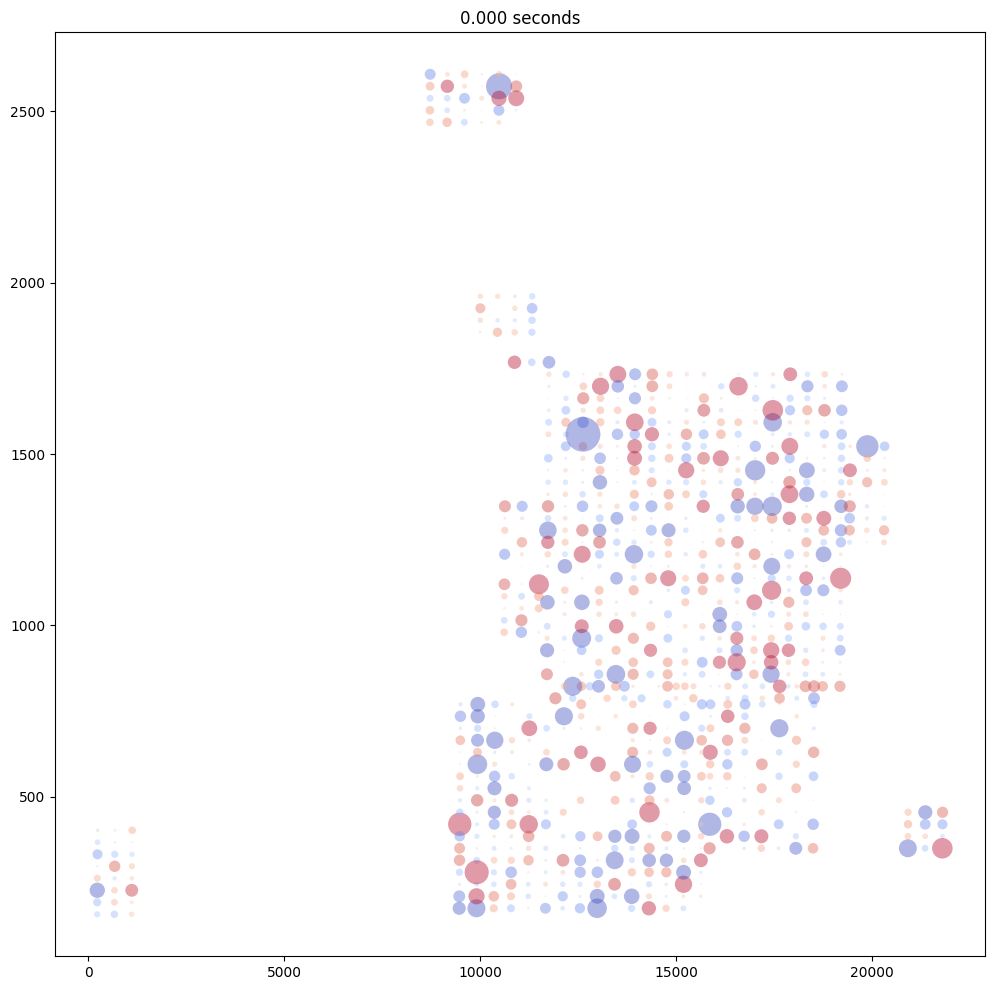

In [6]:
animate_waves_theta( data_raw, movie_range_ms= range(0,1000, 5) )

## alpha

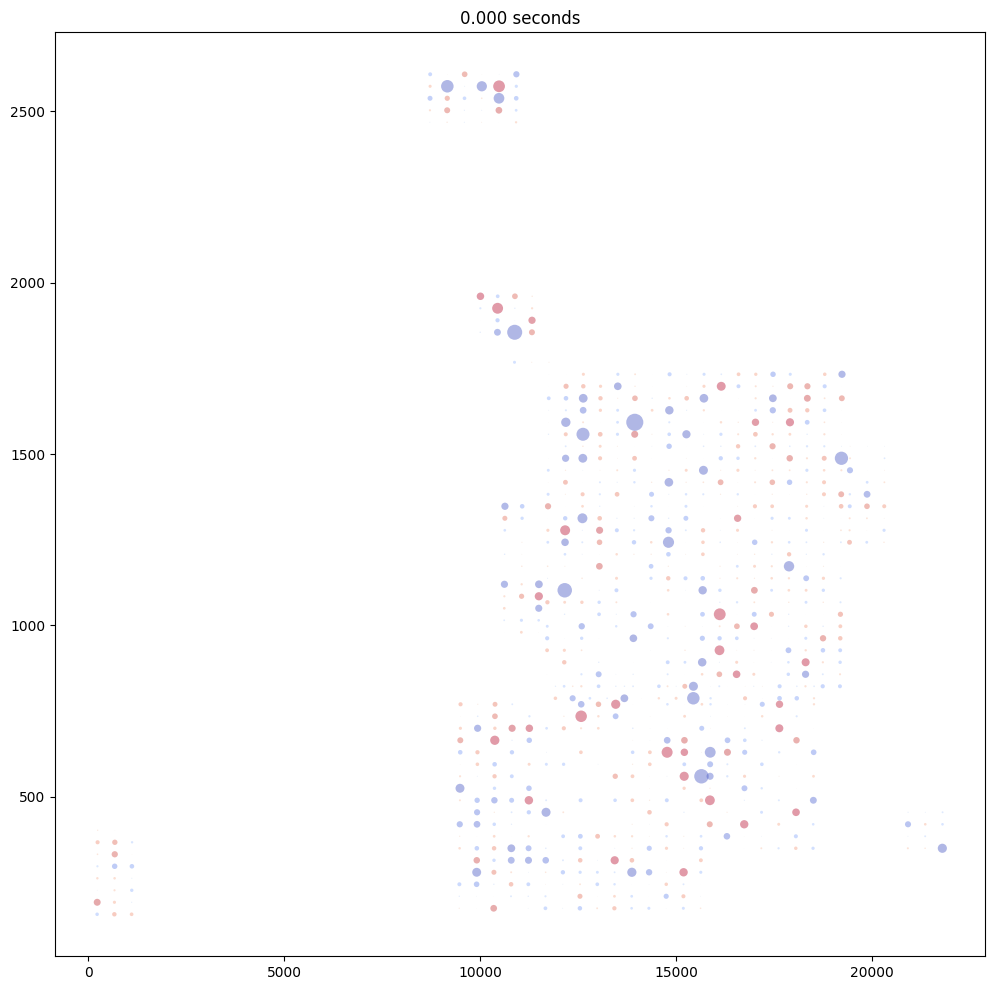

In [21]:
### Long Alpha Animation
fig = plt.figure( figsize=(12,12) )           # Determine the size of the figure
ax = plt.axes()                               # get axis element to later create plot
data = waves["alpha"]                         # Get the alpha wave dataset for plotting
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) ) # norm determines color range for data
# Create scatter plot, 
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 , alpha=.4, edgecolor='none' ) 

# animation function: The i in this function relate to the range in FuncAnimation, shown below
def animate( i ):
    scatter.set_array(data[:,i])   # This changes the value of `c` the color
    scatter._sizes = (np.abs(data[:,i])**2.3)*80  # This changes the size of the datapoints
    ax.set_title(f"{i/1000:.3f} seconds") # We display the current time
    return scatter

# Create animation form data between 2000 and 5000ms, with a step of 3, displaying each plot for 100ms
anim = FuncAnimation(fig, animate, frames=range(0, 3000, 3), interval=100, blit=False)

In [22]:
anim.save("media/test.mp4")